In [12]:
from sklearn.datasets import fetch_california_housing

In [10]:
# 1. Imports
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import tensorflow as tf
from tensorflow import keras


# Build Neural Network (Keras)

In [11]:
# 2. Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for NN training)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


# Train Models with Different Activations & Optimizers

In [3]:
# 3. Build model function (with explicit Input layer)
def build_model(activation="relu", optimizer="adam"):
    model = keras.Sequential([
        keras.Input(shape=(X_train.shape[1],)),    # Explicit Input layer
        keras.layers.Dense(64, activation=activation),
        keras.layers.Dense(32, activation=activation),
        keras.layers.Dense(1, activation="linear")  # Linear output for regression
    ])

    model.compile(
        optimizer=optimizer,
        loss="mse",       # Mean Squared Error
        metrics=["mae"]   # Mean Absolute Error
    )
    return model


In [4]:
# 4. Train models with different configs
# Model 1: ReLU + Adam
model_relu_adam = build_model("relu", "adam")
history_relu_adam = model_relu_adam.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20, batch_size=32, verbose=0
)

# Model 2: Tanh + Adam
model_tanh_adam = build_model("tanh", "adam")
history_tanh_adam = model_tanh_adam.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20, batch_size=32, verbose=0
)

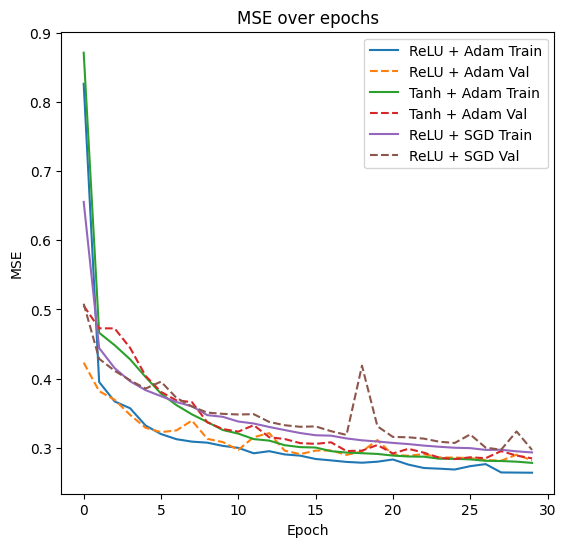

In [15]:
# 4. Train models and store histories
histories = {}   # <-- make sure this is defined before using it

configs = [
    ("ReLU + Adam", "relu", "adam"),
    ("Tanh + Adam", "tanh", "adam"),
    ("ReLU + SGD", "relu", "sgd")
]

models = {}  # to keep trained models for evaluation

for name, act, opt in configs:
    model = build_model(act, opt)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=30,
        batch_size=32,
        verbose=0
    )
    histories[name] = history
    models[name] = model  # save trained model

# 5. Plot training curves
plt.figure(figsize=(14,6))

# MSE plot
plt.subplot(1,2,1)
for name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{name} Train')
    plt.plot(history.history['val_loss'], '--', label=f'{name} Val')
plt.title('MSE over epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

# Evaluate Models

In [5]:
# Model 3: ReLU + SGD
model_relu_sgd = build_model("relu", "sgd")
history_relu_sgd = model_relu_sgd.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20, batch_size=32, verbose=0
)


In [6]:
# 5. Evaluation function
def evaluate_model(model, X, y):
    preds = model.predict(X).flatten()
    mse = mean_squared_error(y, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, preds)
    return mse, rmse, mae

In [9]:
# 6. Report results
for name, model in [
    ("ReLU + Adam", model_relu_adam),
    ("Tanh + Adam", model_tanh_adam),
    ("ReLU + SGD", model_relu_sgd)
]:
    mse, rmse, mae = evaluate_model(model, X_val, y_val)
    print(f"{name} → MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
ReLU + Adam → MSE: 0.2941, RMSE: 0.5423, MAE: 0.3652
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Tanh + Adam → MSE: 0.2979, RMSE: 0.5458, MAE: 0.3694
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
ReLU + SGD → MSE: 0.3251, RMSE: 0.5702, MAE: 0.3921
